# Red Wine Quality Analysis Using Exploratory Data Techniques

In this project, I analyze the red wine quality dataset from UCI to identify top-quality wines based on chemical composition. The goal is to filter wines meeting ideal characteristics and visualize their comparative properties.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')

In [3]:
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df_red.shape

(1599, 12)

In [6]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df_red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

##  Key Features for Better Wine Quality

| Feature                  | Ideal Trend for Better Wine     | Reason                                                                                                  |
| ------------------------ | ------------------------------- | ------------------------------------------------------------------------------------------------------- |
| **Alcohol**              | 🔼 Higher                       | Higher alcohol is generally associated with better quality (up to a point), as it adds body and warmth. |
| **Volatile Acidity**     | 🔽 Lower                        | Too much volatile acidity gives vinegary off-flavors. Lower is better.                                  |
| **Sulphates**            | 🔼 Slightly Higher              | Acts as an antioxidant and antimicrobial; contributes to wine stability.                                |
| **Citric Acid**          | 🔼 Balanced                     | Adds freshness and flavor, but too much can be sour. Moderate amounts help.                             |
| **Fixed Acidity**        | ⚖️ Moderate                     | Important for structure and aging potential, but extreme levels (too high or low) aren't ideal.         |
| **pH**                   | ⚖️ Lower (around 3.0–3.3)       | Lower pH means higher acidity, which is better for stability and flavor.                                |
| **Residual Sugar**       | ⚖️ Low to Moderate              | Depends on wine type. Dry wines prefer low sugar, but dessert wines may need more.                      |
| **Density**              | 🔽 Lower                        | Correlates with sugar content and alcohol. Lower density often means a drier, more fermented wine.      |
| **Free Sulfur Dioxide**  | 🔼 Sufficient but Not Excessive | Protects wine from spoilage. Too much affects taste; too little causes oxidation.                       |
| **Total Sulfur Dioxide** | 🔽 Lower                        | High levels may cause off-flavors and headaches.                                                        |
| **Chlorides**            | 🔽 Lower                        | High saltiness from chlorides can spoil taste.                                                          |


Now we are on the path to finding the best wine composition with the help of the chart above.

In [8]:
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


But first, before we move on, let's check for any null values using the **isna()** method and
also check for duplicate values using the **duplicated()** method.

In [9]:
df_red.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

It looks like there are no null values — that's pretty good. Now, we shall check for duplicate values. However, we already know there will likely be some duplicates in this wine dataset.

**And no, it’s not okay to keep exact duplicate rows in your wine dataset unless you have a documented reason.**

**Always check df.duplicated().sum() and decide accordingly.**

In [10]:
df_red.duplicated().sum()

np.int64(240)

We do have duplicate values, so let's remove them from the DataFrame using:

**df_red = df_red.drop_duplicates()**

This will overwrite the existing DataFrame that was previously stored in df_red.

In [11]:
wine_df = df_red.drop_duplicates() # I have used a different variable name cause this might help me in future maybe for comparison ar maybe something else

In [12]:
# Checking if the duplicate values were removed or not
wine_df.duplicated().sum()

np.int64(0)

## Let's find out what makes factors make a perfect wine

With the hekp of the Key Features given below:

| Feature                  | Ideal Trend for Better Wine     | Reason                                                                                                  |
| ------------------------ | ------------------------------- | ------------------------------------------------------------------------------------------------------- |
| **Alcohol**              | 🔼 Higher                       | Higher alcohol is generally associated with better quality (up to a point), as it adds body and warmth. |
| **Volatile Acidity**     | 🔽 Lower                        | Too much volatile acidity gives vinegary off-flavors. Lower is better.                                  |
| **Sulphates**            | 🔼 Slightly Higher              | Acts as an antioxidant and antimicrobial; contributes to wine stability.                                |
| **Citric Acid**          | 🔼 Balanced                     | Adds freshness and flavor, but too much can be sour. Moderate amounts help.                             |
| **Fixed Acidity**        | ⚖️ Moderate                     | Important for structure and aging potential, but extreme levels (too high or low) aren't ideal.         |
| **pH**                   | ⚖️ Lower (around 3.0–3.3)       | Lower pH means higher acidity, which is better for stability and flavor.                                |
| **Residual Sugar**       | ⚖️ Low to Moderate              | Depends on wine type. Dry wines prefer low sugar, but dessert wines may need more.                      |
| **Density**              | 🔽 Lower                        | Correlates with sugar content and alcohol. Lower density often means a drier, more fermented wine.      |
| **Free Sulfur Dioxide**  | 🔼 Sufficient but Not Excessive | Protects wine from spoilage. Too much affects taste; too little causes oxidation.                       |
| **Total Sulfur Dioxide** | 🔽 Lower                        | High levels may cause off-flavors and headaches.                                                        |
| **Chlorides**            | 🔽 Lower                        | High saltiness from chlorides can spoil taste.                                                          |


**Don't worry you will see this data table more often**

---

Let's see what the average value for the alcohol percentage is

In [13]:
alcohol_mean = wine_df.alcohol.mean()

Let's find some alcohols which have higher alcohol percentage than the average alcohols

In [14]:
alcohol_df = wine_df[wine_df.alcohol >= alcohol_mean]

In [15]:
alcohol_df = alcohol_df.sort_values('alcohol',ascending=False)

In [16]:
alcohol_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8
467,8.8,0.46,0.45,2.6,0.065,7.0,18.0,0.99470,3.32,0.79,14.0,6
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
279,8.9,0.40,0.32,5.6,0.087,10.0,47.0,0.99910,3.38,0.77,10.5,7
291,11.0,0.20,0.48,2.0,0.343,6.0,18.0,0.99790,3.30,0.71,10.5,5
252,11.1,0.35,0.48,3.1,0.090,5.0,21.0,0.99860,3.17,0.53,10.5,5
1513,6.4,0.56,0.15,1.8,0.078,17.0,65.0,0.99294,3.33,0.60,10.5,6


Now let's look at the average volatile acidity

In [17]:
avg_acidity = wine_df['volatile acidity'].mean()
avg_acidity

np.float64(0.5294775570272259)

Now we are checking for the wines which not only have higher alcohol but also lower **volatile acidity**

### According to the sources the Ideal Range for Volatile Acidity in Wine should be :

* Typical range in wine datasets:
    * 0.10 to 1.50 g/dm³ (grams per liter)

* For better quality wines:
    * Volatile Acidity should ideally be below 0.5 g/dm³

In [18]:
lower_acidity = alcohol_df.query('0.5 <= `volatile acidity` <= 1.5')

In [19]:
lower_acidity.shape

(243, 12)

Well, the number of rows in the table has significantly dropped — from 1599 rows and 12 columns to 243 rows and 12 columns with just two operations

In [20]:
lower_acidity

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
455,11.3,0.620,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8
378,11.4,0.625,0.66,6.2,0.088,6.0,24.0,0.99880,3.11,0.99,13.3,6
45,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4
1120,7.9,0.540,0.34,2.5,0.076,8.0,17.0,0.99235,3.20,0.72,13.1,8
198,5.4,0.835,0.08,1.2,0.046,13.0,93.0,0.99240,3.57,0.85,13.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1339,7.5,0.510,0.02,1.7,0.084,13.0,31.0,0.99538,3.36,0.54,10.5,6
1312,8.0,1.180,0.21,1.9,0.083,14.0,41.0,0.99532,3.34,0.47,10.5,5
417,7.0,0.580,0.12,1.9,0.091,34.0,124.0,0.99560,3.44,0.48,10.5,5
403,11.4,0.600,0.49,2.7,0.085,10.0,41.0,0.99940,3.15,0.63,10.5,6


### Use the following Key Features given below:

| Feature                  | Ideal Trend for Better Wine     | Reason                                                                                                  |
| ------------------------ | ------------------------------- | ------------------------------------------------------------------------------------------------------- |
| **Alcohol**              | 🔼 Higher                       | Higher alcohol is generally associated with better quality (up to a point), as it adds body and warmth. |
| **Volatile Acidity**     | 🔽 Lower                        | Too much volatile acidity gives vinegary off-flavors. Lower is better.                                  |
| **Sulphates**            | 🔼 Slightly Higher              | Acts as an antioxidant and antimicrobial; contributes to wine stability.                                |
| **Citric Acid**          | 🔼 Balanced                     | Adds freshness and flavor, but too much can be sour. Moderate amounts help.                             |
| **Fixed Acidity**        | ⚖️ Moderate                     | Important for structure and aging potential, but extreme levels (too high or low) aren't ideal.         |
| **pH**                   | ⚖️ Lower (around 3.0–3.3)       | Lower pH means higher acidity, which is better for stability and flavor.                                |
| **Residual Sugar**       | ⚖️ Low to Moderate              | Depends on wine type. Dry wines prefer low sugar, but dessert wines may need more.                      |
| **Density**              | 🔽 Lower                        | Correlates with sugar content and alcohol. Lower density often means a drier, more fermented wine.      |
| **Free Sulfur Dioxide**  | 🔼 Sufficient but Not Excessive | Protects wine from spoilage. Too much affects taste; too little causes oxidation.                       |
| **Total Sulfur Dioxide** | 🔽 Lower                        | High levels may cause off-flavors and headaches.                                                        |
| **Chlorides**            | 🔽 Lower                        | High saltiness from chlorides can spoil taste.                                                          |


**Don't worry you will see this data table more often**

---

How much sulphate should be there in a good wine

### According to the rources the Sulphate Levels for Better Wine should be:

* Typical Range (from UCI dataset):
    * 0.22 to 1.08 g/dm³

* Best Range for High Quality Wine:
    * 0.5 to 0.7 g/dm³

In [21]:
sulphate_lavel = lower_acidity.query('0.5 <= `sulphates` <= 0.7')

In [22]:
sulphate_lavel

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
455,11.3,0.620,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8
45,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4
131,5.6,0.500,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.0,5
95,4.7,0.600,0.17,2.3,0.058,17.0,106.0,0.99320,3.85,0.60,12.9,6
1052,5.6,0.605,0.05,2.4,0.073,19.0,25.0,0.99258,3.56,0.55,12.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
657,12.0,0.500,0.59,1.4,0.073,23.0,42.0,0.99800,2.92,0.68,10.5,7
1245,7.4,0.550,0.19,1.8,0.082,15.0,34.0,0.99655,3.49,0.68,10.5,5
1339,7.5,0.510,0.02,1.7,0.084,13.0,31.0,0.99538,3.36,0.54,10.5,6
403,11.4,0.600,0.49,2.7,0.085,10.0,41.0,0.99940,3.15,0.63,10.5,6


### Use the following Key Features given below:

| Feature                  | Ideal Trend for Better Wine     | Reason                                                                                                  |
| ------------------------ | ------------------------------- | ------------------------------------------------------------------------------------------------------- |
| **Alcohol**              | 🔼 Higher                       | Higher alcohol is generally associated with better quality (up to a point), as it adds body and warmth. |
| **Volatile Acidity**     | 🔽 Lower                        | Too much volatile acidity gives vinegary off-flavors. Lower is better.                                  |
| **Sulphates**            | 🔼 Slightly Higher              | Acts as an antioxidant and antimicrobial; contributes to wine stability.                                |
| **Citric Acid**          | 🔼 Balanced                     | Adds freshness and flavor, but too much can be sour. Moderate amounts help.                             |
| **Fixed Acidity**        | ⚖️ Moderate                     | Important for structure and aging potential, but extreme levels (too high or low) aren't ideal.         |
| **pH**                   | ⚖️ Lower (around 3.0–3.3)       | Lower pH means higher acidity, which is better for stability and flavor.                                |
| **Residual Sugar**       | ⚖️ Low to Moderate              | Depends on wine type. Dry wines prefer low sugar, but dessert wines may need more.                      |
| **Density**              | 🔽 Lower                        | Correlates with sugar content and alcohol. Lower density often means a drier, more fermented wine.      |
| **Free Sulfur Dioxide**  | 🔼 Sufficient but Not Excessive | Protects wine from spoilage. Too much affects taste; too little causes oxidation.                       |
| **Total Sulfur Dioxide** | 🔽 Lower                        | High levels may cause off-flavors and headaches.                                                        |
| **Chlorides**            | 🔽 Lower                        | High saltiness from chlorides can spoil taste.                                                          |


**Don't worry you will see this data table more often**

---

### According to the sources the Ideal Citric Acid Range should be:

* Typical range in UCI wine dataset:
    * 0.00 to 1.00 g/dm³

* Best range for high-quality wines:
    * 0.25 to 0.45 g/dm³

In [23]:
citric_acid = sulphate_lavel.query('0.5 <= `citric acid` <= 0.7')

In [24]:
citric_acid.shape

(6, 12)

In [25]:
citric_acid

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8
513,10.5,0.51,0.64,2.4,0.107,6.0,15.0,0.99730,3.09,0.66,11.8,7
861,5.8,1.01,0.66,2.0,0.039,15.0,88.0,0.99357,3.66,0.60,11.5,6
397,11.5,0.59,0.59,2.6,0.087,13.0,49.0,0.99880,3.18,0.65,11.0,6
811,12.9,0.50,0.55,2.8,0.072,7.0,24.0,1.00012,3.09,0.68,10.9,6
657,12.0,0.50,0.59,1.4,0.073,23.0,42.0,0.99800,2.92,0.68,10.5,7


### According to the sources the Typical Fixed Acidity Range should be:

* UCI Dataset Range:
    * 4.6 to 15.9 g/dm³

* Best Range for High-Quality Wines:
    * 6.0 to 8.0 g/dm³

In [26]:
fixed_acidity = citric_acid.query('6.0 <= `fixed acidity` <= 8.0')

In [27]:
fixed_acidity.shape

(0, 12)

Well now as you can see we have ran into a real world problem 
As you can clearly see:
* Either all values are either above 8.0 or below 6.0 —
* Or none fall within the range 6.0 <= fixed acidity <= 8.0.

#### What can we do about it??

* Option 1: Loosen the range slightly
    * If your goal is to select moderate fixed acidity, maybe expanding the range might help:

        **fixed_acidity = citric_acid.query('5.0 <= `fixed acidity` <= 10.0')**
    
    * This might give us a few entries. Maybe it’s okay to be a bit flexible — especially in smaller datasets after heavy filtering.

* Option 2: Create categories instead of filters
    * If you're running into too few rows due to exact matching, try this:
 
          def categorize_fixed_acidity(val):
              if val < 6.0:
                 return 'Low'
              elif val > 8.0:
                 return 'High'
              else:
                 return 'Moderate'

**citric_acid['fixed_acidity_category'] = citric_acid['fixed acidity'].apply(categorize_fixed_acidity)**
Then you can group or visualize by these categories:

**What I'll do is find the mean of the fixed acidity, and then select an upper and a lower value, keeping in mind that the values should be close to the mean.**

In [28]:
avg_fixed_acidity = citric_acid['fixed acidity'].mean()

In [29]:
avg_fixed_acidity

np.float64(10.666666666666666)

In [30]:
lower = avg_fixed_acidity - 1.0
upper = avg_fixed_acidity + 1.0

In [31]:
fixed_acidity = citric_acid.query('@lower <= `fixed acidity` <= @upper')

In [32]:
fixed_acidity.shape

(3, 12)

In [33]:
fixed_acidity

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.9988,3.22,0.69,13.4,8
513,10.5,0.51,0.64,2.4,0.107,6.0,15.0,0.9973,3.09,0.66,11.8,7
397,11.5,0.59,0.59,2.6,0.087,13.0,49.0,0.9988,3.18,0.65,11.0,6


Since we are down to the last 3 wines let me give it one more filter if the output is 2 rows then we will start with the plotting part, 
let's go with **residual sugar**

### According to the sources the Residual Sugar Range should be:

* Observed Range:
    * 0.9 to 15.5 g/dm³

* Best Range for High-Quality Wines (especially dry wines):
    * 1.5 to 3.0 g/dm³

In [34]:
sugar_level = fixed_acidity.query('1.5 <= `residual sugar` <= 3.0')

In [35]:
sugar_level

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
513,10.5,0.51,0.64,2.4,0.107,6.0,15.0,0.9973,3.09,0.66,11.8,7
397,11.5,0.59,0.59,2.6,0.087,13.0,49.0,0.9988,3.18,0.65,11.0,6


In [36]:
topwine_df = sugar_level

In [37]:
topwine_df.at[513, 'wine name'] = 'Chianti Classico (Italy)'
topwine_df.at[397, 'wine name'] = 'Chianti (Italy)'

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21464\3491881510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topwine_df.at[513, 'wine name'] = 'Chianti Classico (Italy)'


In [38]:
topwine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine name
513,10.5,0.51,0.64,2.4,0.107,6.0,15.0,0.9973,3.09,0.66,11.8,7,Chianti Classico (Italy)
397,11.5,0.59,0.59,2.6,0.087,13.0,49.0,0.9988,3.18,0.65,11.0,6,Chianti (Italy)


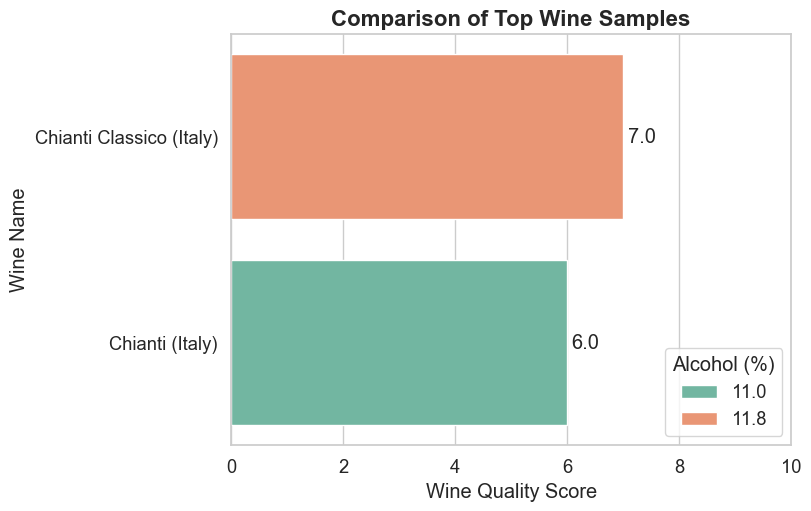

In [39]:
# Setting a clean Seaborn style
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(8, 5), constrained_layout=True)

# Creating a horizontal bar plot
barplot = sns.barplot(data=topwine_df, x='quality', y='wine name', hue='alcohol', palette='Set2', dodge=False)

# Adding values labels to bars
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

# Titles and labels
plt.title('Comparison of Top Wine Samples', fontsize=16, fontweight='bold')
plt.xlabel('Wine Quality Score')
plt.ylabel('Wine Name')
plt.legend(title='Alcohol (%)', loc='lower right')
plt.xlim(0, 10)  # assuming quality is rated out of 10

plt.show()

In [40]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21464\2097290799.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=avg_alcohol_per_quality, x='quality', y='alcohol', palette='Set2')


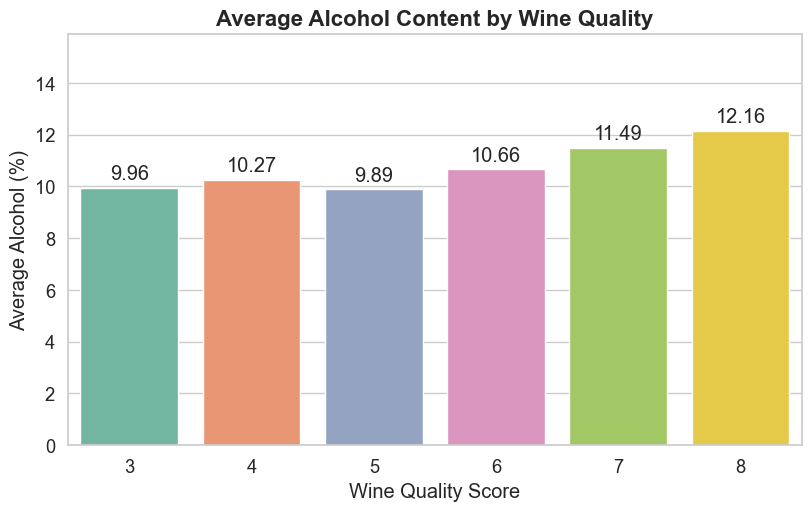

In [41]:
# Group by quality and calculate mean alcohol
avg_alcohol_per_quality = wine_df.groupby('quality')['alcohol'].mean().reset_index()

# Set style
sns.set(style="whitegrid", font_scale=1.2)

plt.figure(figsize=(8, 5), constrained_layout=True)

# Create bar plot
barplot = sns.barplot(data=avg_alcohol_per_quality, x='quality', y='alcohol', palette='Set2')

# Add value labels
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

# Titles and labels
plt.title('Average Alcohol Content by Wine Quality', fontsize=16, fontweight='bold')
plt.xlabel('Wine Quality Score')
plt.ylabel('Average Alcohol (%)')
plt.ylim(0, wine_df['alcohol'].max() + 1)

plt.show()

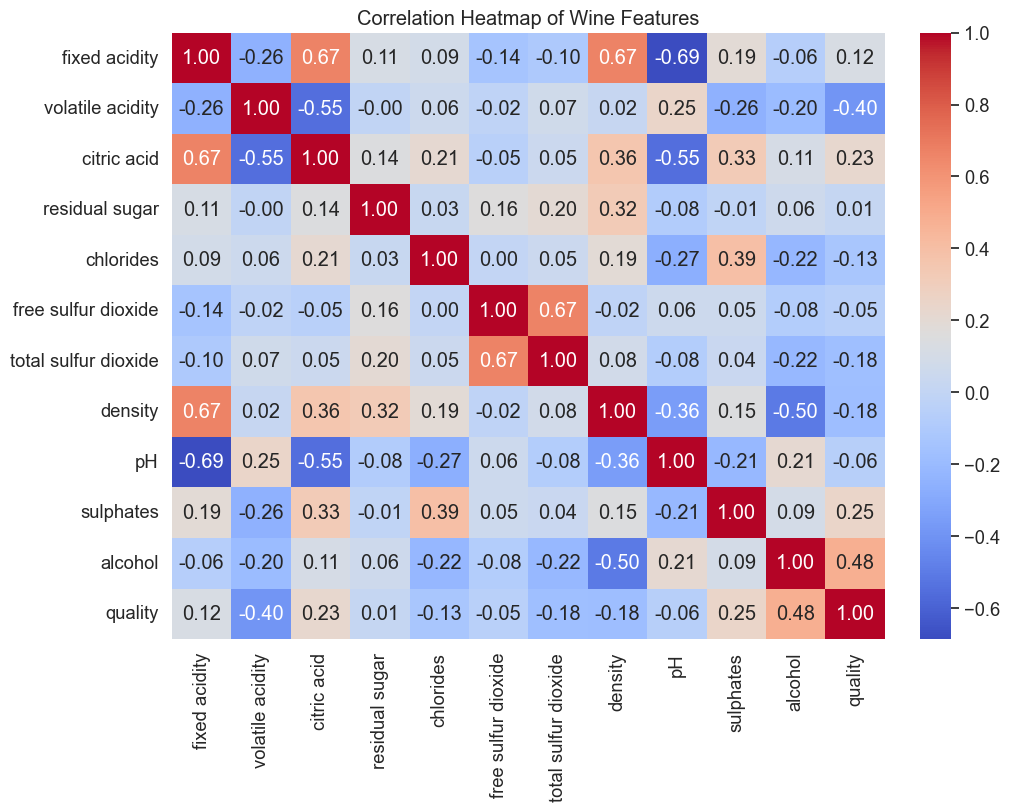

In [42]:
plt.figure(figsize=(10, 8), constrained_layout=True)
sns.heatmap(wine_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Wine Features")
plt.show()